# Actividad dos

## kNN simple

### Instrucciones:

- Hacer los gráficos vistos en clase.

### Parte uno:

1. Leer el conjunto de datos Advertising.

2. Obtener un subconjunto de los datos de TV y ventas de la fila 5 a la fila 13.

3. Aplicar el algoritmo 'kNN' con 'k = 1' y realizar la gráfica. 

### Parte dos:

1. Leer el conjunto de datos Advertising.

2. Dividir los datos en conjuntos de entrenamiento y prueba utilizando la función 'train_test_split()'.

3. Establece 'k_list' como los posibles valores de 'k' que van de 1 a 70.

4. Para cada valor de 'k' en 'k_list':

- Utilizar 'sklearn KNeighborsRegressor()' para ajustar los datos de entrenamiento,

- Predecir en los datos de Prueba.

- Haga un gráfico para 'k = 1, 10, 70'.

# Parte uno

## Carga de datos

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # División del conjunto de datos
from sklearn.neighbors import KNeighborsRegressor # Ajustar los datos de entrenamiento 
from sklearn.metrics import mean_squared_error # Para calcular error

# Leemos el CSV  y lo convertimos en un dataframe
datos = pd.read_csv(r"C:\Users\Carlo\OneDrive\Documentos\curso-ciencia-datos\Datos\Unidad_uno\Advertising.csv")
datos.head(13)

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [36]:
# Defino el nuevo DataFrame con .loc[]
df = datos.loc[4:12, ['TV','Sales']]
df

,TV,Sales
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6
10,66.1,8.6
11,214.7,17.4
12,23.8,9.2


### Aplicar kNN  con K = 1

In [37]:
# Guardamos las variables independiente y dependiente
X = df[['TV']].values # Extraemos los valores de la calumna 'Tv' del nuevo DataFrame
y = df[['Sales']].values # Extraemos los valores de la calumna 'Sales' del nuevo DataFrame

# Se crea el modelo kNN con k = 1
knn = KNeighborsRegressor(n_neighbors = 1) # n_neighbors indica cuántos vecinos se consideran

# Ajustamos el modelo a los datos
knn.fit(X,y) #aqui kNN "memoriza" los datos para luego hacer la predicción

# Con np.linespace se crea un rango de valores para dibujar la predicción de manera suave
# Con np.reshape hacemos un arreglo bidimensional que luego sera recibido por knn.predict()
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Aqui se predicen las ventas con los valores de X_range
y_pred = knn.predict(X_range)



## Gráfica

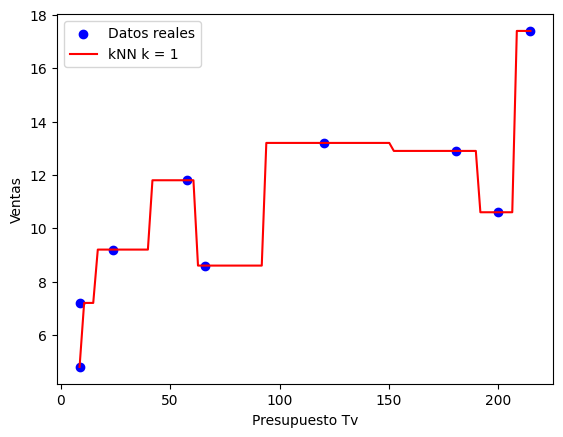

In [38]:
plt.scatter(X, y, color = "blue", label = "Datos reales") # Puntos reales
plt.plot(X_range, y_pred, color = "red", label = "kNN k = 1") # Predicción
plt.xlabel('Presupuesto Tv')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Parte dos

In [39]:
# Definimos la lista de k's de 1 a 70
k_list = range(1, 71)

# Guardamos las variables independiente y dependiente
X = datos[['TV']].values # Extraemos los valores de la calumna 'Tv' del nuevo DataFrame
y = datos['Sales'].values # Extraemos los valores de la calumna 'Sales' del nuevo DataFrame

# Dividimos los datos con 30% datos para el test y 70% para la prueba, random_state fija la semilla para reproducirlo de nuevo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

mse_list = [] # Para almacenar errores

# Evaluamos kNN para cada valor de k en k_list y calculamos error
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors = k) # Modelo para k vecinos
    knn.fit(X_train, y_train) # Ajustamos el modelo con los datos de prueba
    y_pred = knn.predict(X_test) # Predecimos la variable dependiente con los datos de prueba
    mse = mean_squared_error(y_test, y_pred) # calculamos el error cuadratico medio
    mse_list.append(mse) # se guarda el error para este k


## Gráficas 

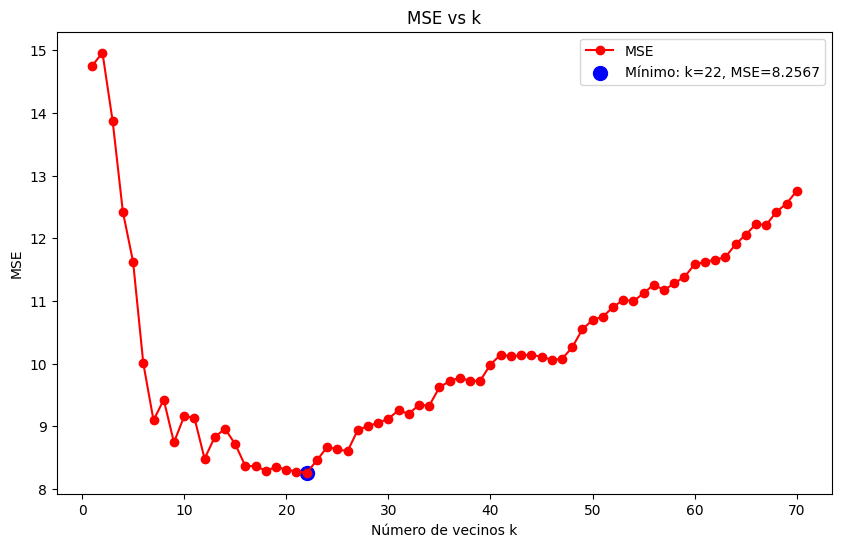

In [40]:
# Se grafica MSE vs cada k
plt.figure(figsize=(10,6))
mse_min = min(mse_list)
k_min = k_list[np.argmin(mse_list)]

plt.plot(k_list, mse_list, marker="o", color="red", label="MSE")

plt.scatter(k_min, mse_min, color="blue", s=100,
            label=f"Mínimo: k={k_min}, MSE={mse_min:.4f}")
plt.xlabel("Número de vecinos k")
plt.ylabel("MSE")
plt.title("MSE vs k")
plt.legend()
plt.show()

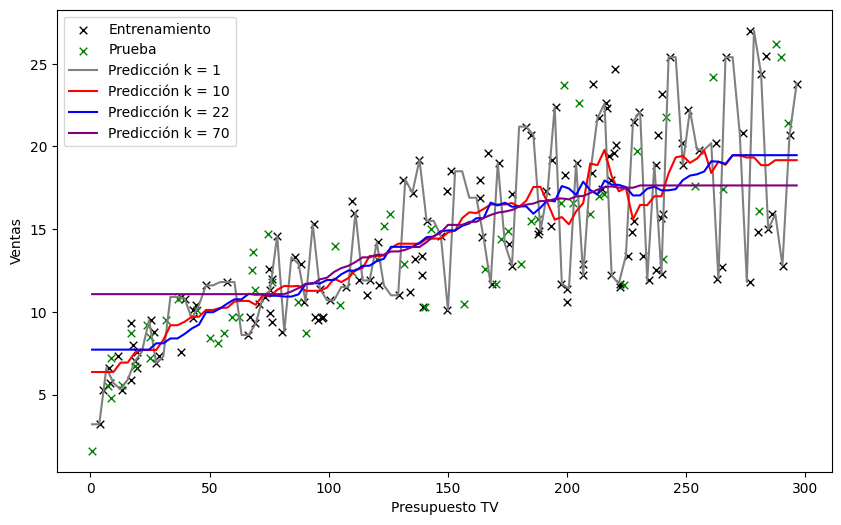

In [41]:
X_range = np.linspace (X.min(), X.max(), 100).reshape(-1,1) # Rango continuo de X

# Lista de valores k del ejercicio
k_values = [1, 10, 22, 70]

#diccionario para guardar predicciones
predictions = {}

# Modelo para k = 1, 10, 70 y ajuste
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    predictions[k] = knn.predict(X_range) # k es la calve del diccionario y la predicción es el valor 

colors = ["gray", "red", "blue", "purple"]

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color = "black", label = "Entrenamiento", marker = "x", s = 30, linewidths = 1)
plt.scatter(X_test, y_test, color = "green", label = "Prueba", marker = "x", s = 30, linewidths = 1)

for k, color in zip(k_values, colors):
    plt.plot(X_range, predictions[k], color = color, label = f"Predicción k = {k}")
    
plt.xlabel("Presupuesto TV")
plt.ylabel("Ventas")
plt.legend()
plt.show()
